In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# criaçao de Dataframe
clientes_df = pd.read_csv('./data/Marketing.csv')

In [3]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
clientes_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
clientes_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# criação de Dataframe com atributos e seus tipos 

info = clientes_df.nunique().sort_values()

# determinando o tipo de dado de cada uma das variáveis do dataset.

info = pd.DataFrame(info.values, index = info.index, columns = ['Uniques'])

# atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

info['types'] = clientes_df.dtypes

# exibindo Dataframe.

info


,Uniques,types
TENURE,7,int64
BALANCE_FREQUENCY,43,float64
PURCHASES_INSTALLMENTS_FREQUENCY,47,float64
PRC_FULL_PAYMENT,47,float64
PURCHASES_FREQUENCY,47,float64
ONEOFF_PURCHASES_FREQUENCY,47,float64
CASH_ADVANCE_FREQUENCY,54,float64
CASH_ADVANCE_TRX,65,int64
PURCHASES_TRX,173,int64
CREDIT_LIMIT,205,float64


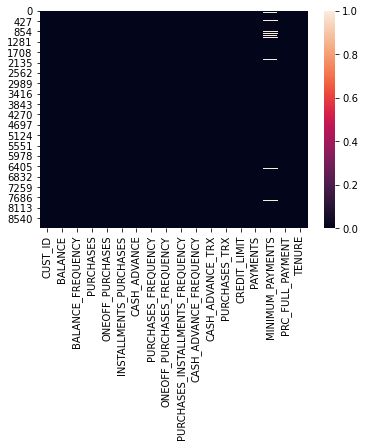

In [7]:
sns.heatmap(clientes_df.isnull());

In [8]:
valores_nulos = pd.DataFrame(clientes_df.isnull().sum())
valores_nulos.columns =  ['Qt_NaN']
valores_nulos

,Qt_NaN
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# localizando os atributos NaN
clientes_df.loc[(clientes_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = clientes_df['MINIMUM_PAYMENTS'].mean()
clientes_df.loc[(clientes_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = clientes_df['CREDIT_LIMIT'].mean()

In [10]:
valores_nulos

,Qt_NaN
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


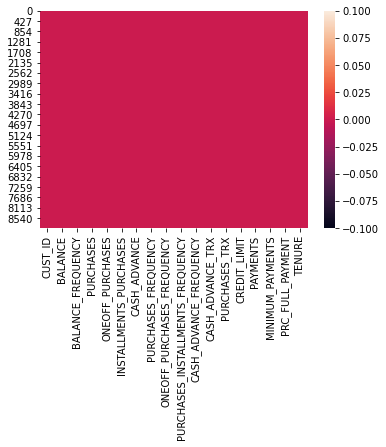

In [11]:
sns.heatmap(clientes_df.isnull());

In [12]:
# apagando a coluna do id do cliente por se irrelevante
clientes_df.drop('CUST_ID', axis=1, inplace=True)

# viz grafica

In [13]:
# coletando nome das colunas
clientes_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

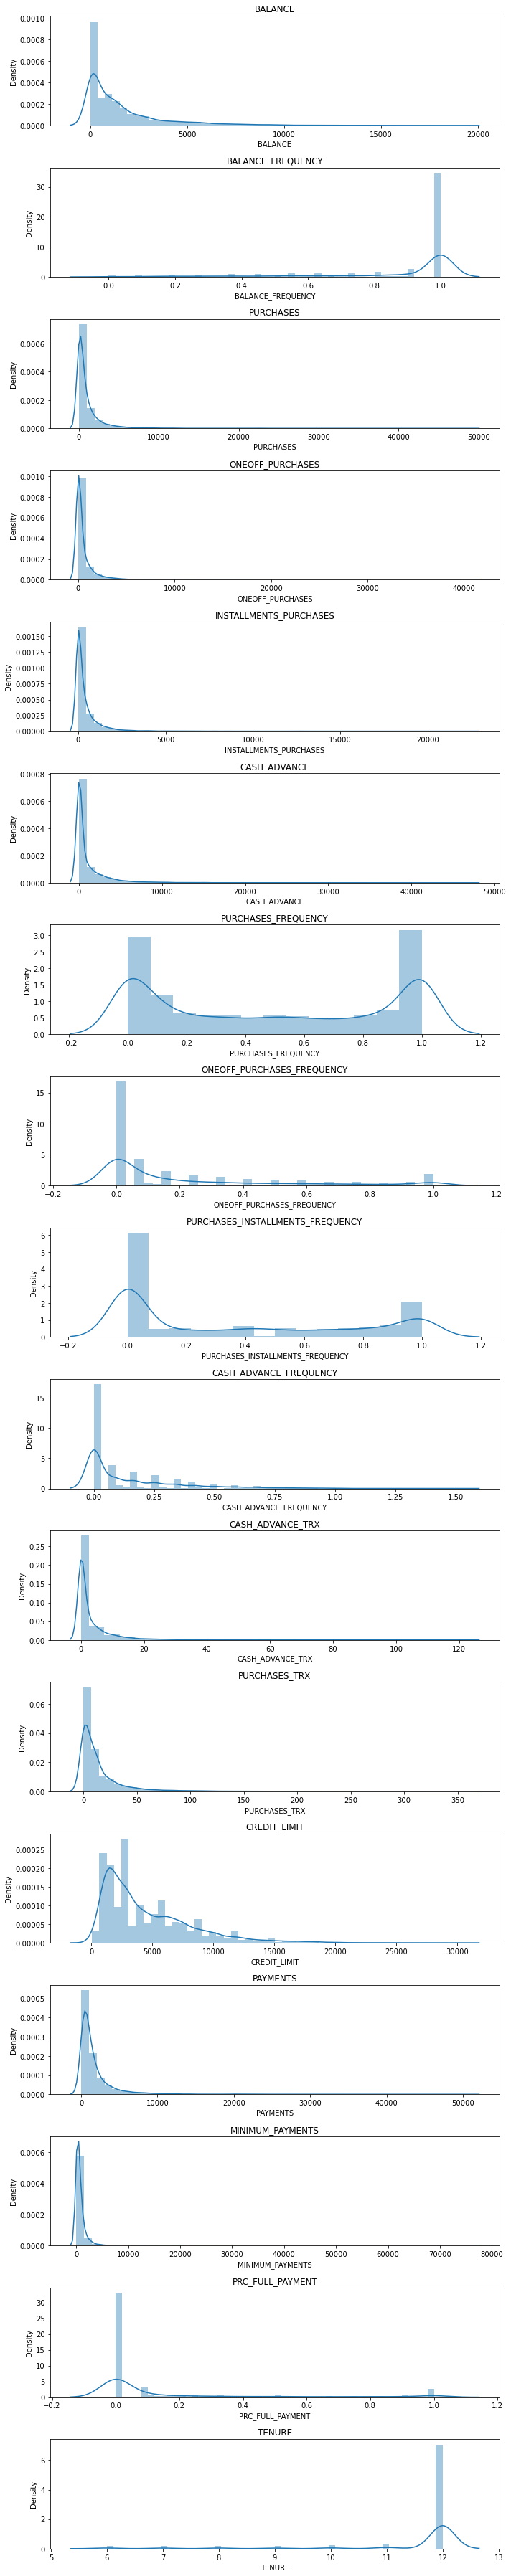

In [14]:
import warnings
warnings.filterwarnings("ignore")

# plotagem de graficos de todas as colunas
plt.figure(figsize=(10, 50))
for i in range(len(clientes_df.columns)):
    plt.subplot( 17 , 1 , i + 1 )
    sns.distplot(clientes_df[clientes_df.columns[i]], kde = True)
    plt.title(clientes_df.columns[i])
plt.tight_layout();

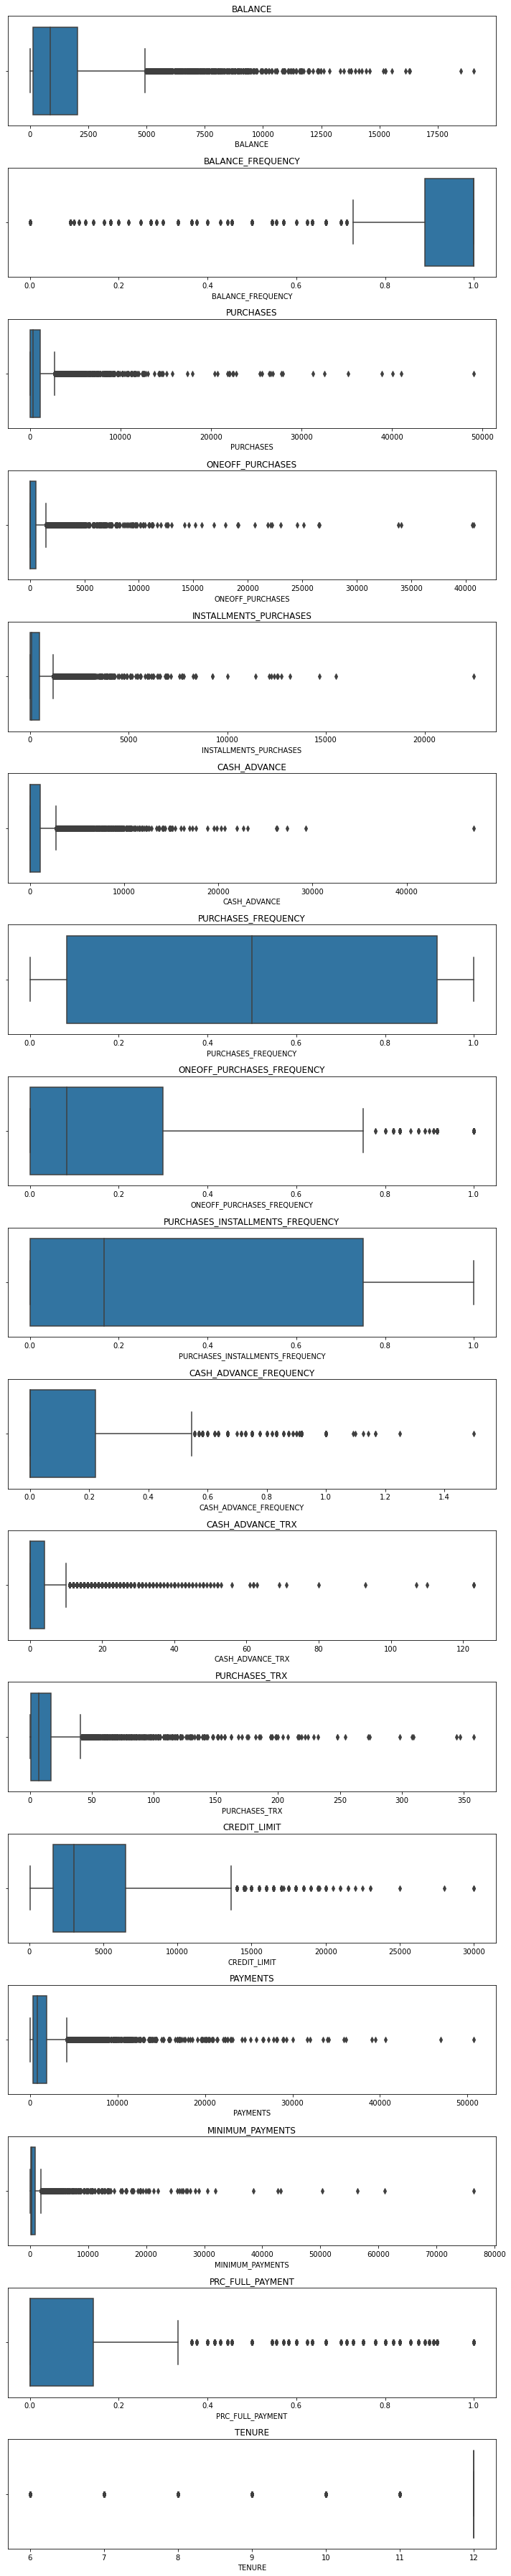

In [15]:
# plotagem de graficos de todas as colunas
plt.figure(figsize=(10, 50))
for i in range(len(clientes_df.columns)):
    plt.subplot( 17 , 1 , i + 1 )
    sns.boxplot(clientes_df[clientes_df.columns[i]],)
    plt.title(clientes_df.columns[i])
plt.tight_layout();

In [16]:
correlações = clientes_df.corr()

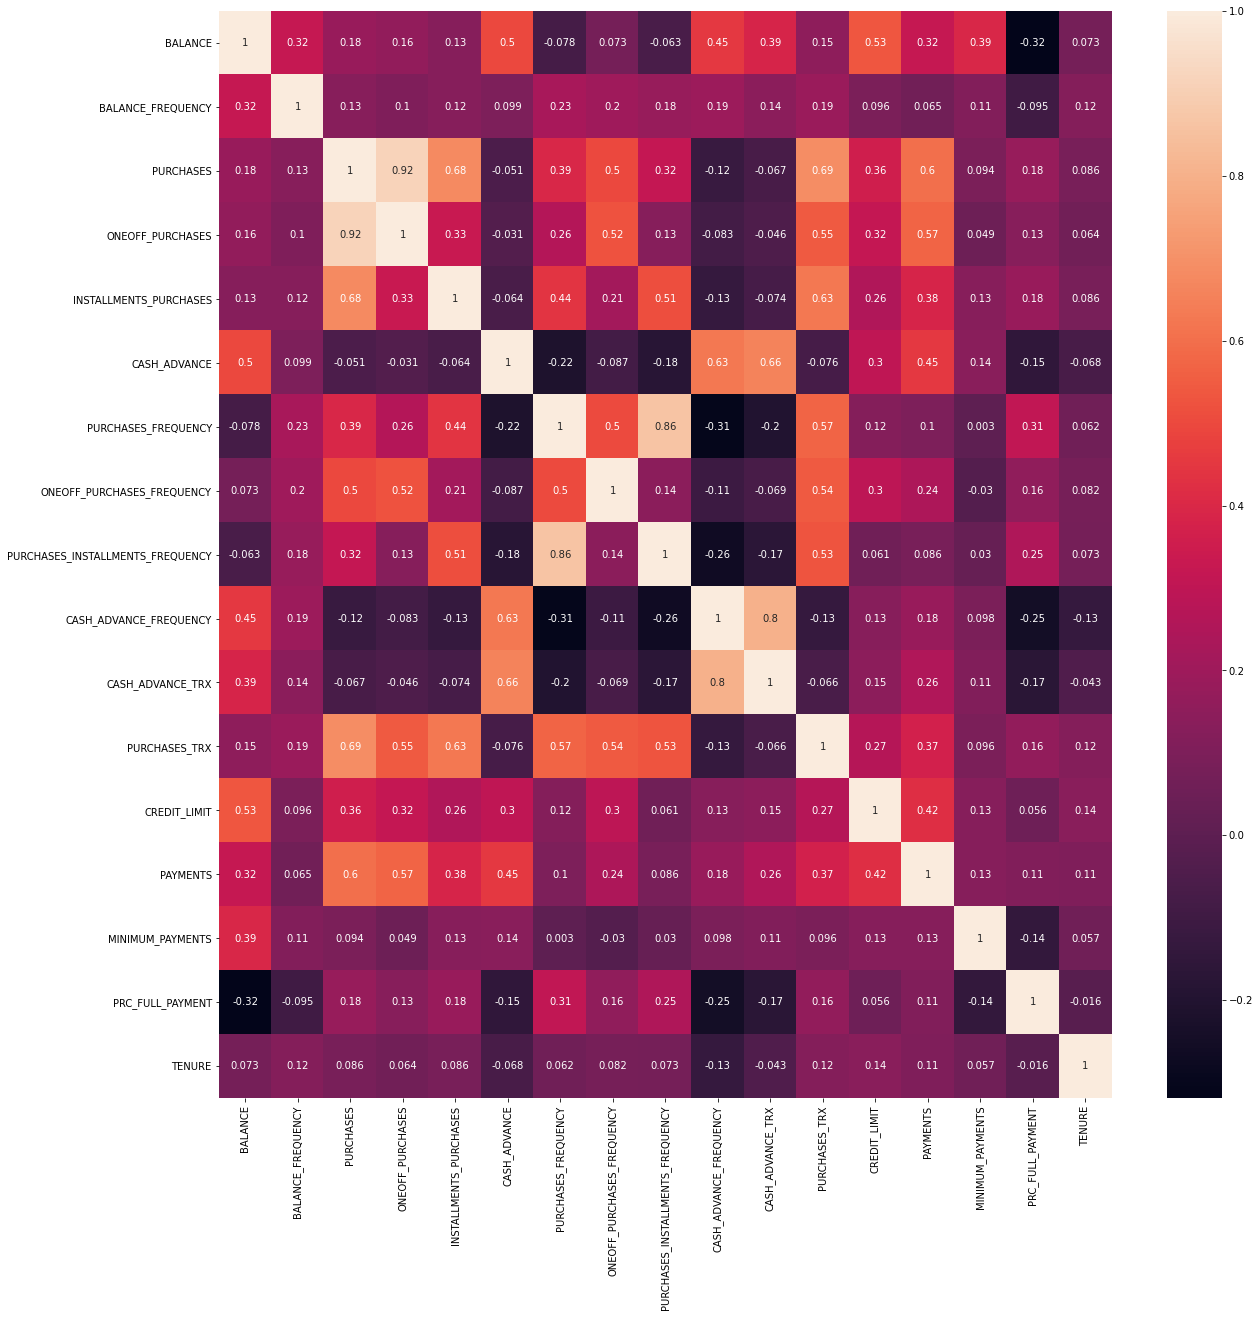

In [17]:
fig, axie = plt.subplots(figsize=(20,20))
sns.heatmap(correlações, annot=True);

In [18]:
# colocar os dados na mesma escala para não gerar ordem de importancia pelos valores
scaler = StandardScaler()
clientes_scaler = scaler.fit_transform(clientes_df)

In [19]:
type(clientes_scaler), type(clientes_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [20]:
min(clientes_scaler[0]), max(clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [21]:
# teste do cotovelo
wcss_1 =[]
range_valores = range(1, 20)
for i in range_valores:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clientes_scaler)
    wcss_1.append(kmeans.inertia_)

In [22]:
print(wcss_1)

[152149.9999999988, 127784.93836261619, 111986.69806610141, 99074.42270603383, 91502.98259428954, 84852.59400226279, 79527.65281672048, 74489.42495106485, 69832.07707067045, 66461.97976672408, 63633.185095404995, 61369.950017523646, 59165.79146230132, 57506.55266118539, 55857.97182655839, 54272.66911770032, 53396.680245272975, 51761.39792571815, 50361.62749396958]


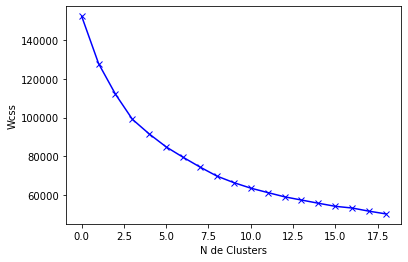

In [23]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('N de Clusters')
plt.ylabel('Wcss')
plt.show()

In [24]:
wcss_1 = pd.DataFrame(wcss_1)
wcss_1.columns = ['wcss']
wcss_1['wcss %'] = wcss_1['wcss'].pct_change()

In [25]:
wcss_1

,wcss,wcss %
0,152150.000000,NaN
1,127784.938363,-0.160138
2,111986.698066,-0.123631
3,99074.422706,-0.115302
4,91502.982594,-0.076422
5,84852.594002,-0.072679
6,79527.652817,-0.062755
7,74489.424951,-0.063352
8,69832.077071,-0.062524
9,66461.979767,-0.048260


In [26]:
# agrupamento com kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(clientes_scaler)
labels = kmeans.labels_

In [27]:
# quantidade de clientes por grupo 
grupos_clientes = np.unique(labels, return_counts=True)
grupos_clientes = pd.DataFrame(grupos_clientes)
grupos_clientes = grupos_clientes.T
grupos_clientes.columns = ['Grupos', 'Qt Clientes']
grupos_clientes

,Grupos,Qt Clientes
0,0,1107
1,1,1182
2,2,847
3,3,30
4,4,414
5,5,2016
6,6,623
7,7,2731


In [28]:
clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns= [clientes_df.columns])

In [29]:
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.167474,0.393214,0.478045,0.621630,-0.011864,-0.333893,0.949178,1.888903,0.095294,-0.407934,-0.324371,0.540314,0.379625,0.102571,-0.163347,0.418824,0.262802
1,-0.701222,-2.139409,-0.310833,-0.235565,-0.302072,-0.322522,-0.555428,-0.443021,-0.439828,-0.521634,-0.376396,-0.419502,-0.177998,-0.202299,-0.257071,0.280448,0.202001
2,1.706890,0.392242,-0.214522,-0.153942,-0.224484,2.050093,-0.472407,-0.209823,-0.409080,1.941162,1.966831,-0.262375,1.040069,0.839280,0.522124,-0.390471,0.067089
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,0.948576,0.466803,2.253694,1.700424,2.204880,-0.190199,1.160224,1.527140,1.260634,-0.307304,-0.206359,2.794340,1.233118,1.282004,0.627023,0.268231,0.333606
5,-0.366913,0.333613,-0.040355,-0.244405,0.353412,-0.365092,0.987373,-0.386663,1.202233,-0.476477,-0.362243,0.185271,-0.259329,-0.218807,-0.055720,0.312050,0.257637
6,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809
7,0.025974,0.404374,-0.361566,-0.246690,-0.401593,-0.081140,-0.867102,-0.409816,-0.759019,0.121296,-0.016248,-0.486573,-0.298143,-0.245661,-0.002667,-0.456207,0.271546


In [30]:
clusters_centers = scaler.inverse_transform(clusters_centers)
clusters_centers = pd.DataFrame(data = clusters_centers, columns=[clientes_df.columns])
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1215.892308,0.970419,2024.555348,1624.216043,400.339304,278.682074,0.871302,0.765954,0.402310,0.053513,1.035230,28.140018,5875.679560,2030.077366,483.532588,0.276213,11.869015
1,104.939796,0.370465,339.104814,201.448528,137.907386,302.527006,0.267430,0.070296,0.189639,0.030760,0.680203,4.282572,3846.818481,1147.508187,265.114438,0.235741,11.787648
2,5117.222857,0.970189,544.875018,336.925917,208.069420,5278.012480,0.300751,0.139863,0.201859,0.523590,16.671006,8.188166,8278.644432,4162.777684,2080.994542,0.039508,11.607101
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,3538.855878,0.987852,5818.256739,3414.792850,2404.913164,580.014963,0.956005,0.658033,0.865446,0.073650,1.840580,84.166667,8981.038647,5444.419995,2325.456914,0.232168,11.963768
5,800.775445,0.956301,916.985188,186.774563,730.653720,213.256778,0.886631,0.087109,0.842236,0.039796,0.776786,19.314980,3550.902878,1099.718500,734.353797,0.244984,11.862103
6,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140
7,1618.536741,0.973063,230.712989,182.982225,47.911840,808.716987,0.142340,0.080202,0.062784,0.159417,3.137944,2.615441,3409.684108,1021.979496,857.990668,0.020282,11.880717


In [31]:
# adcionar os grupos a base de dados
clientes_df_completo = pd.concat([clientes_df, pd.DataFrame({'cluster': labels})], axis = 1)
clientes_df_completo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


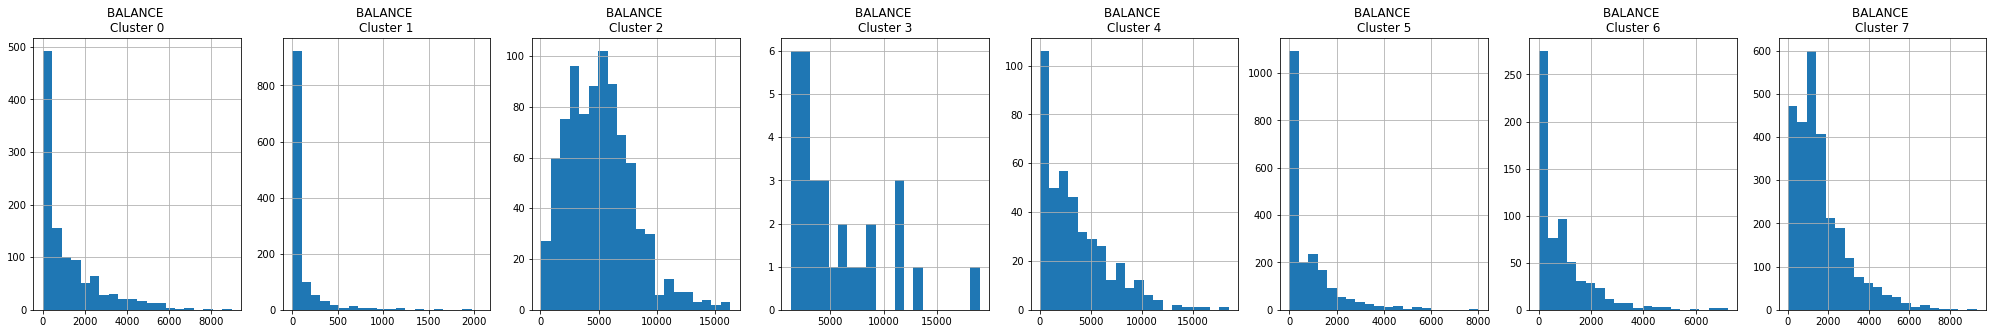

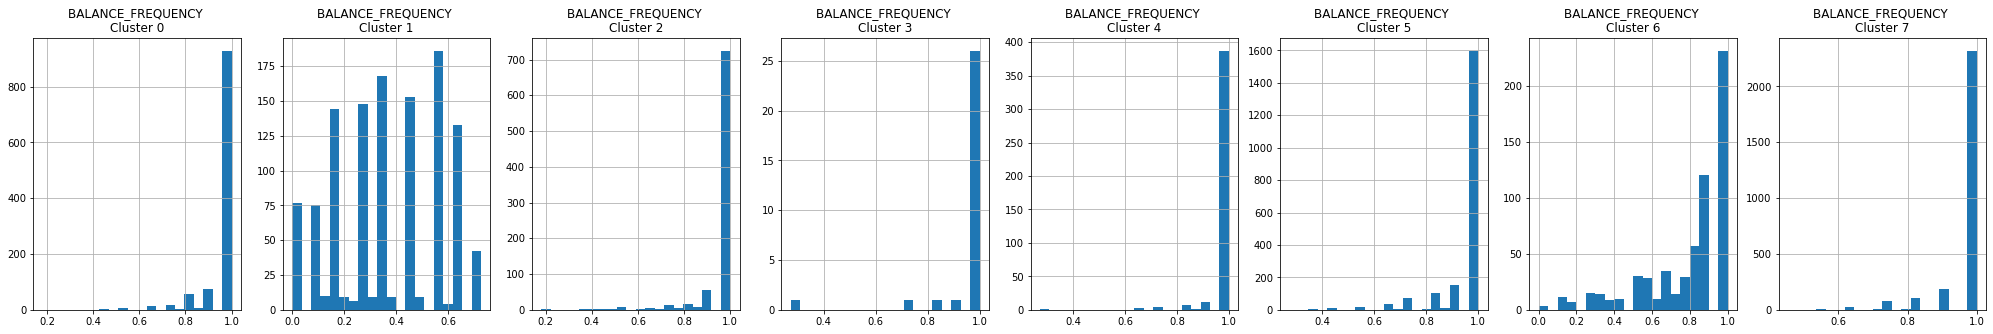

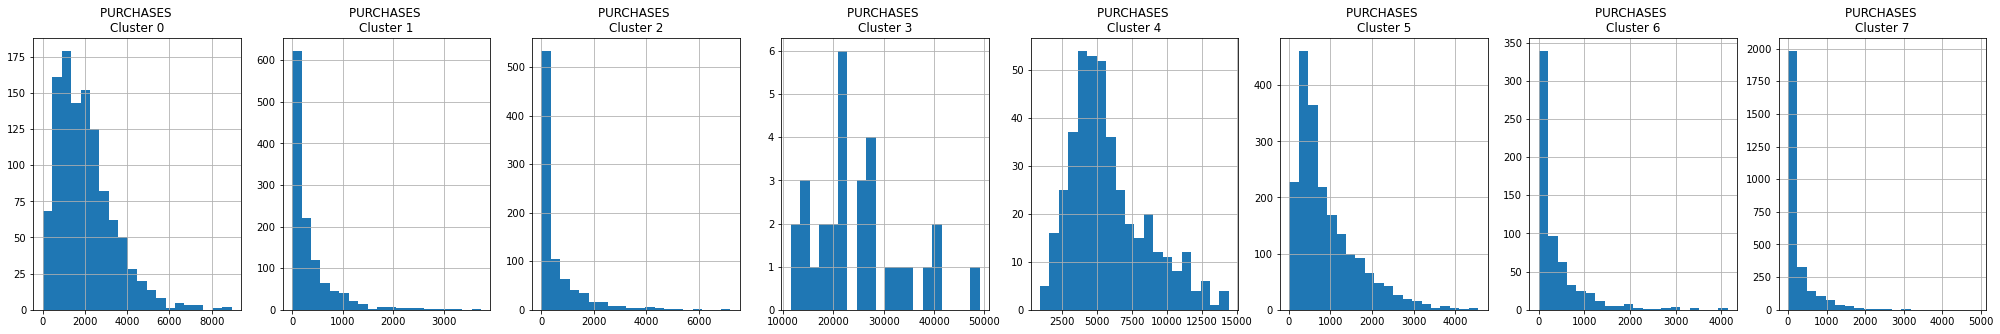

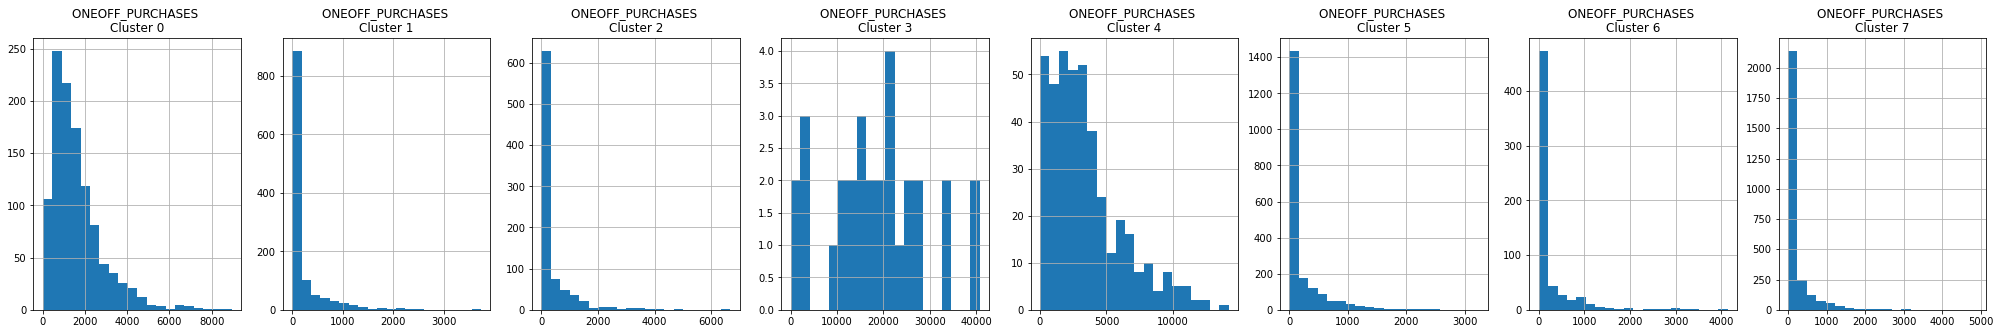

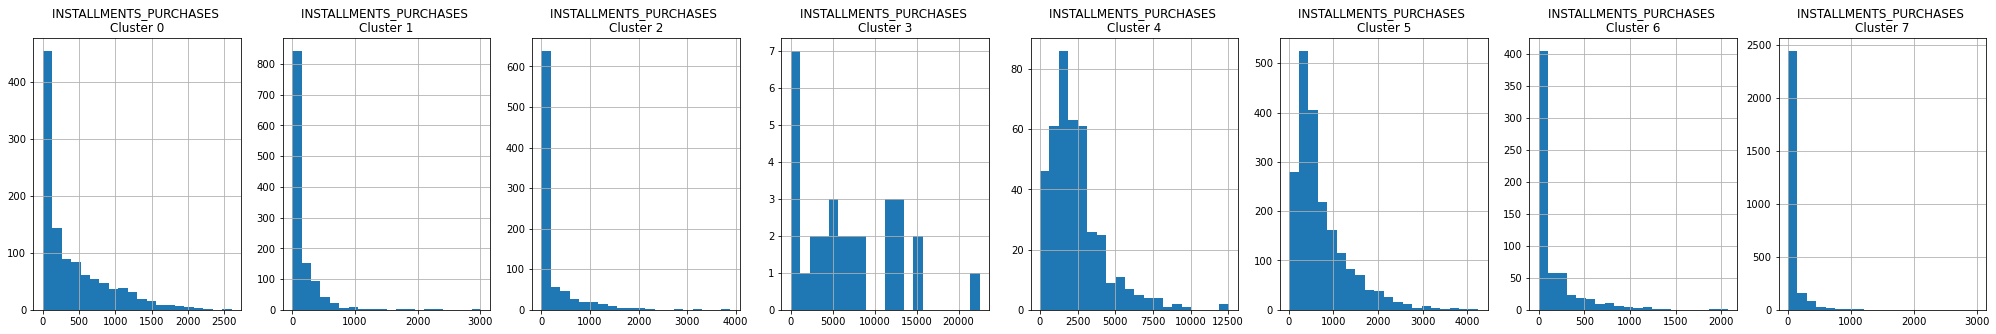

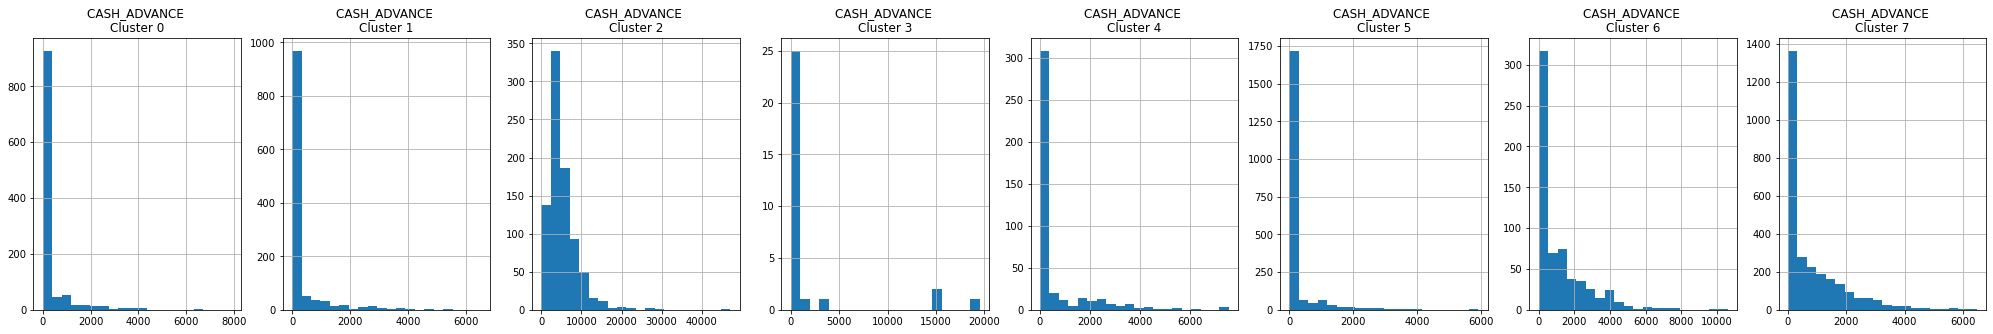

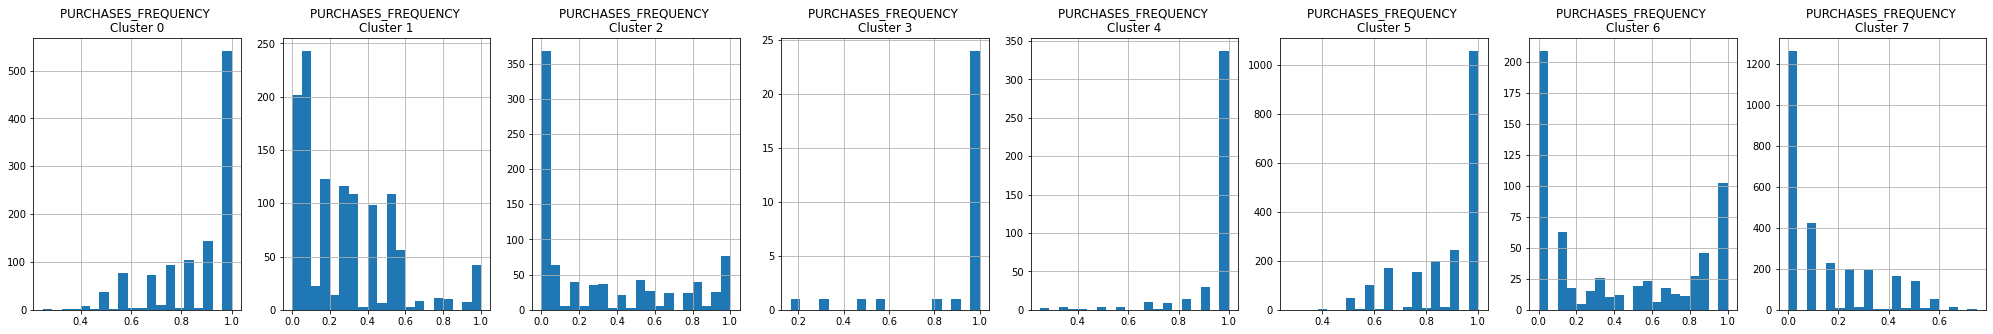

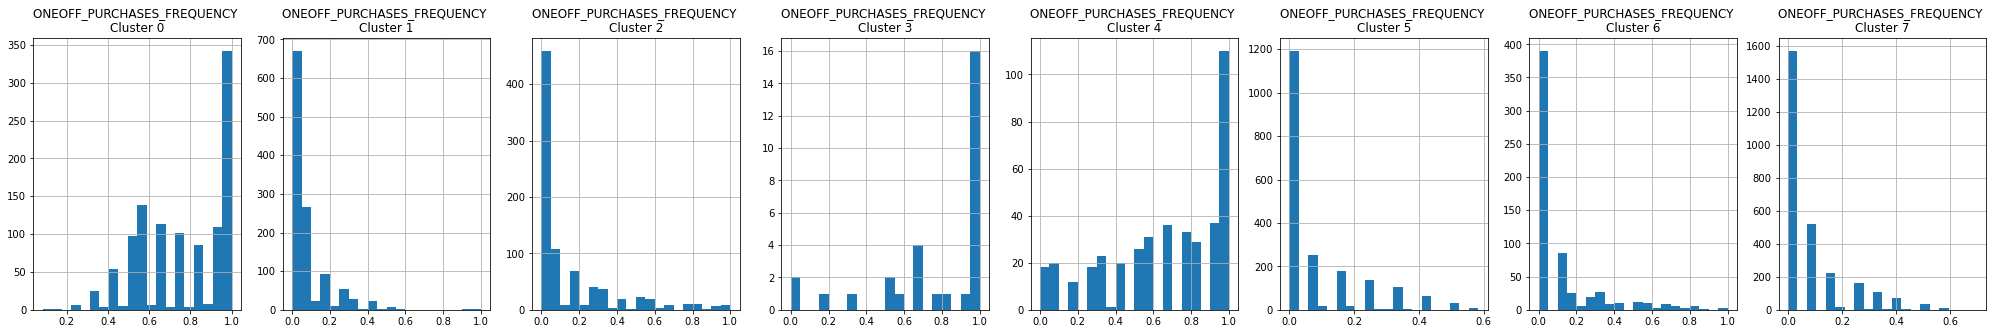

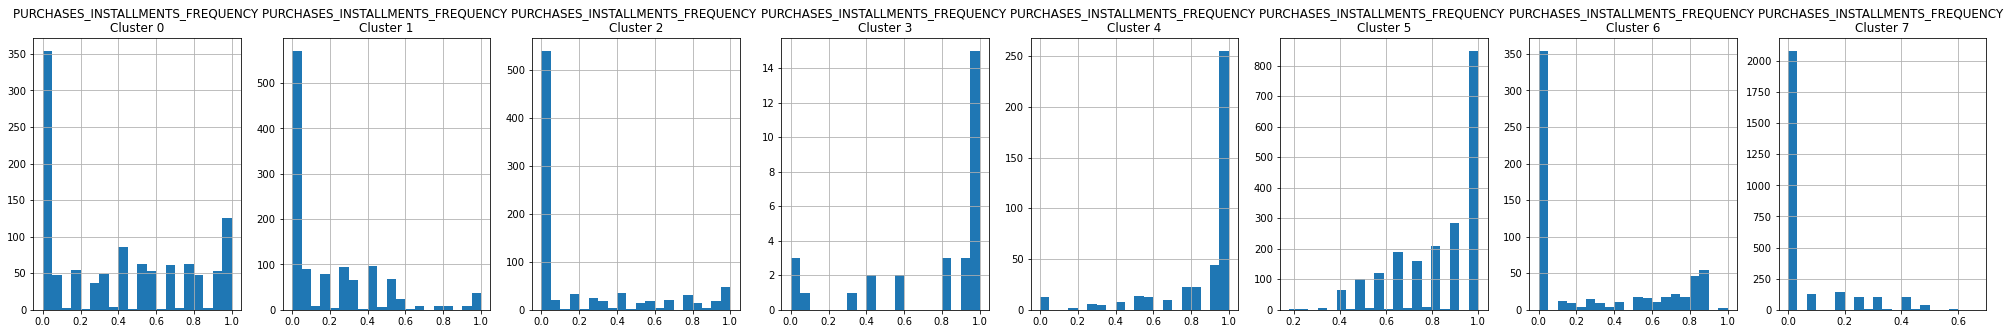

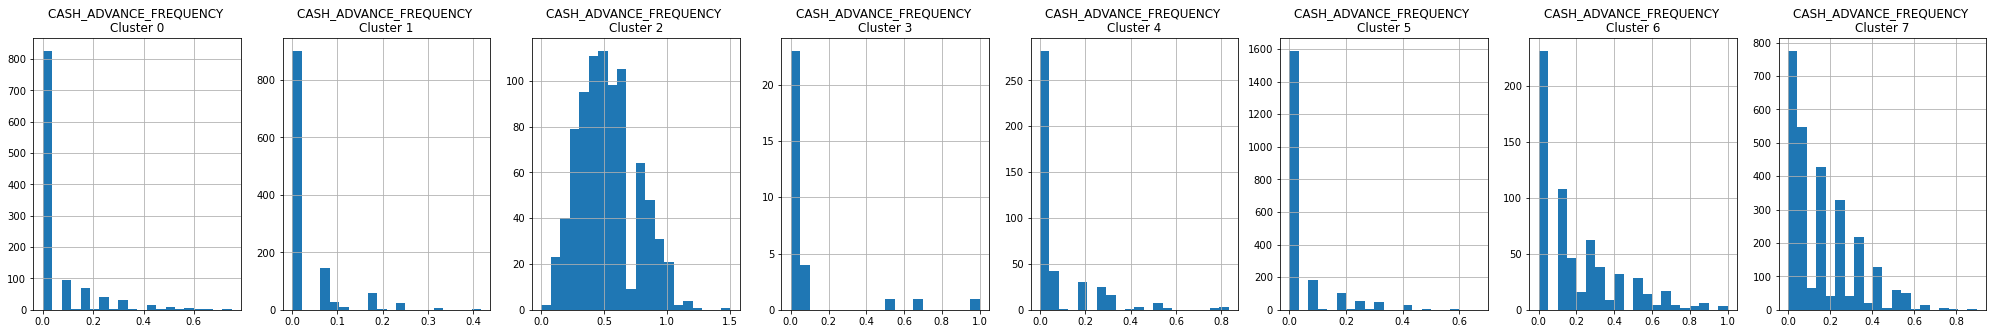

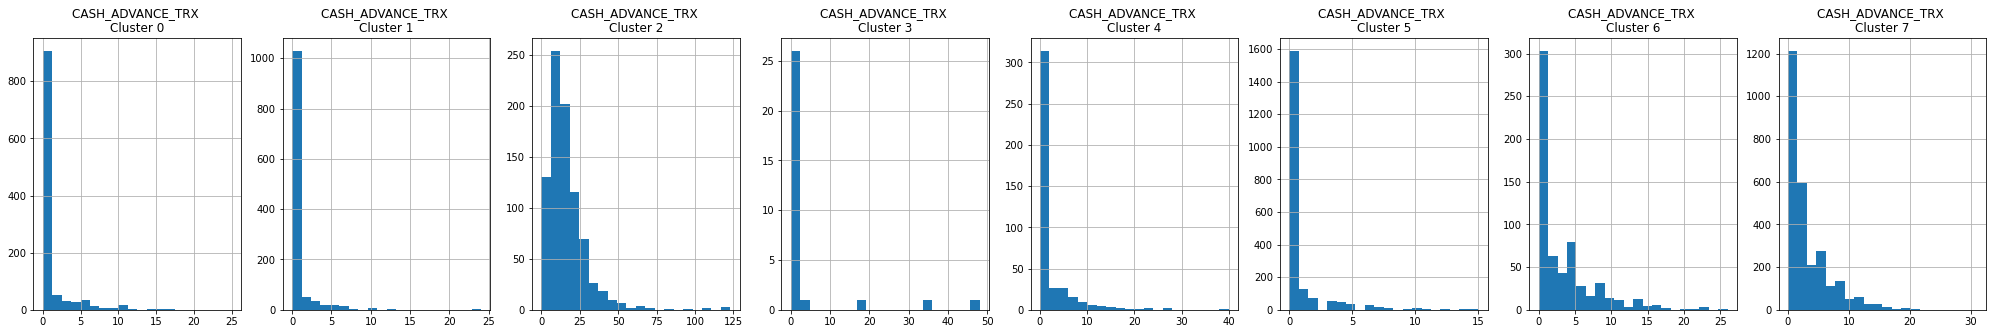

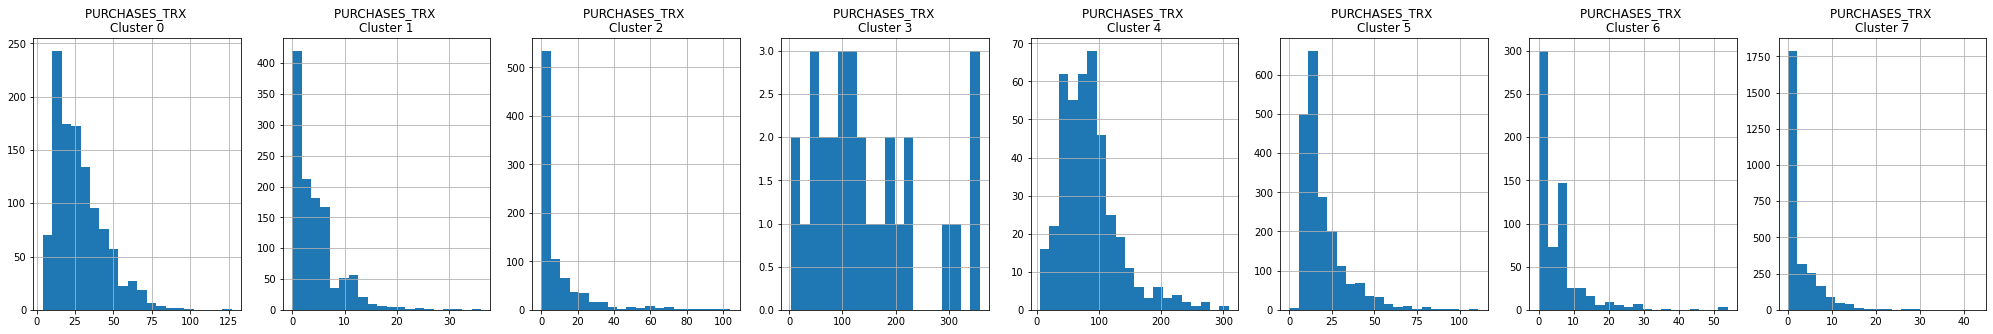

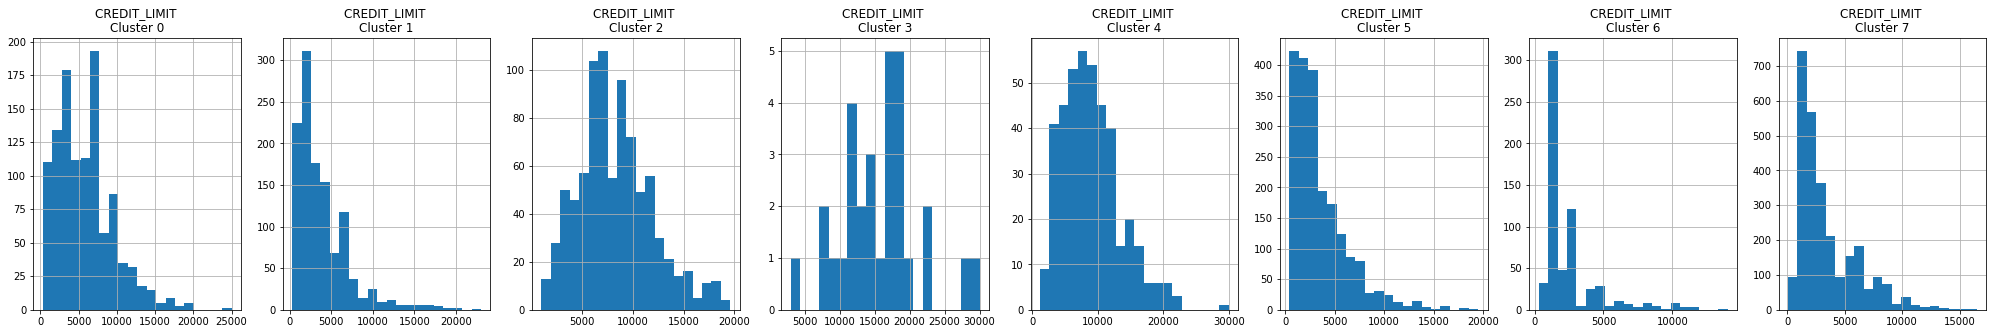

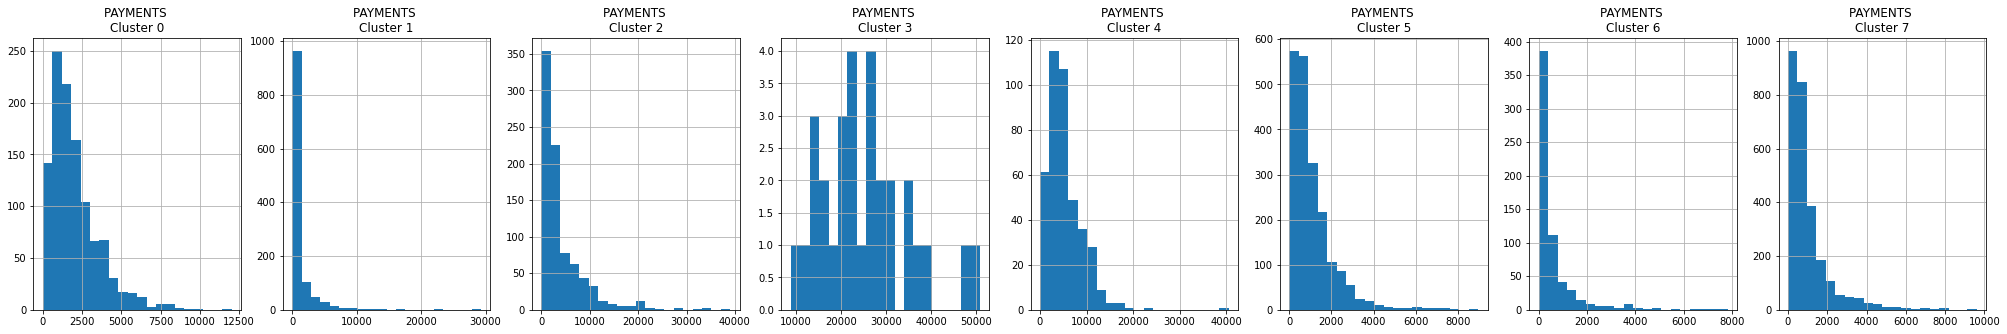

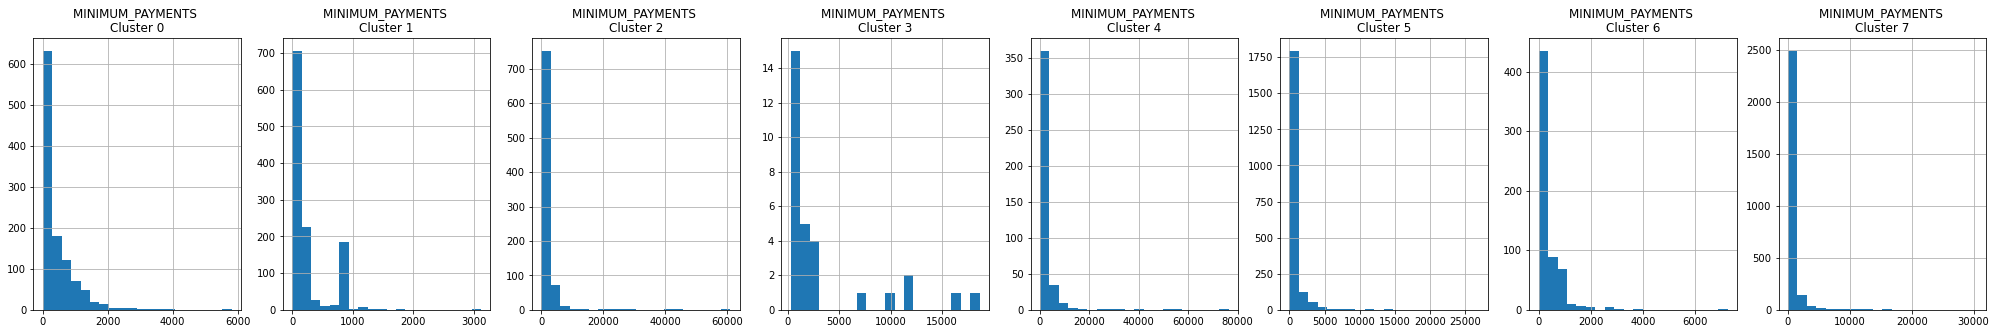

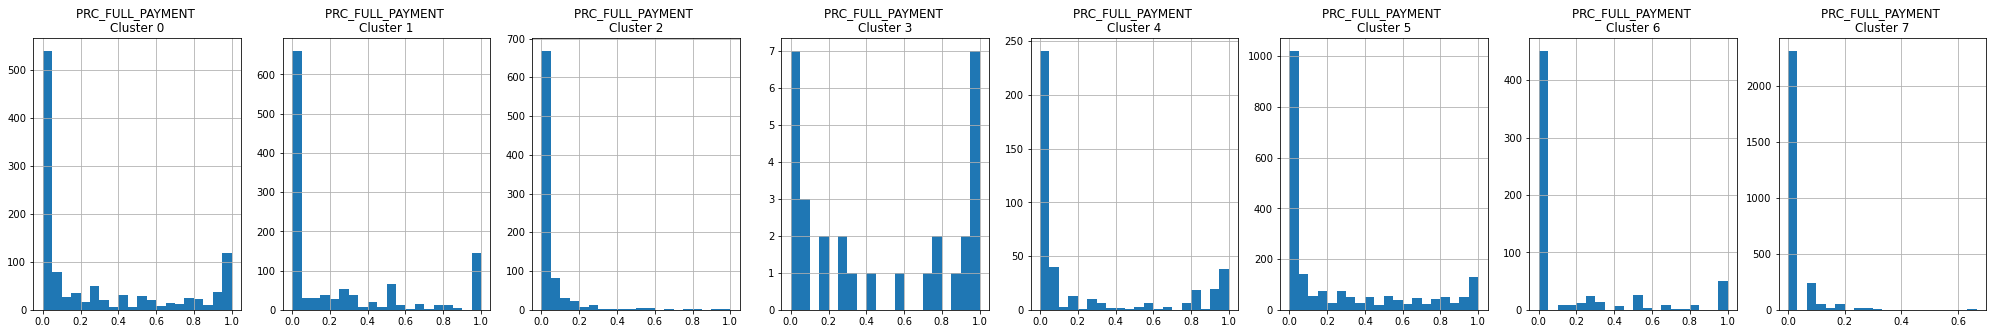

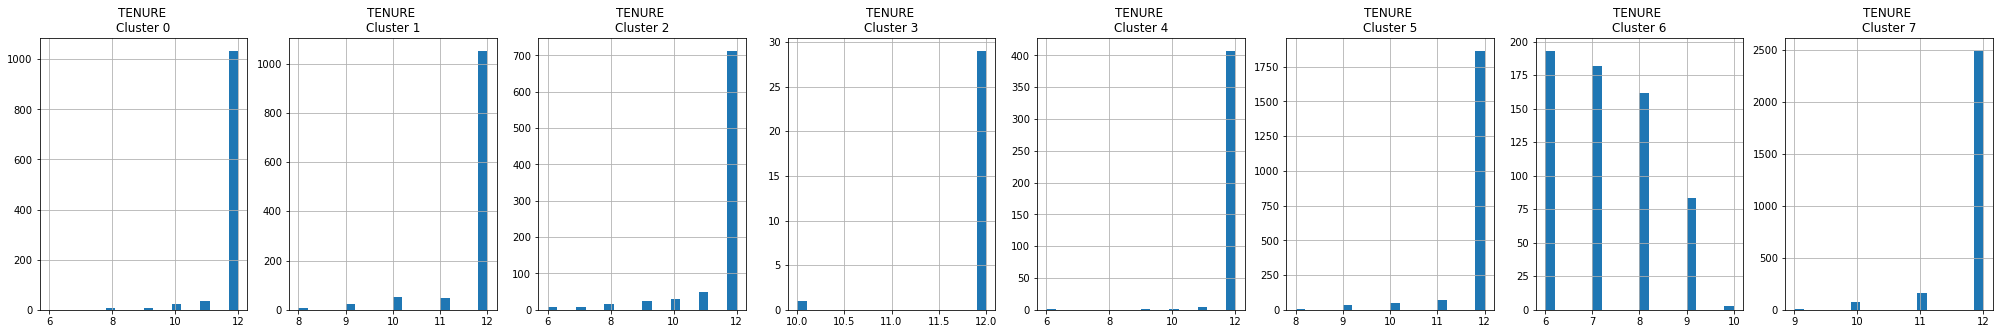

In [32]:
for i in clientes_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = clientes_df_completo[clientes_df_completo['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [33]:
# arquivo para mandar para o departamento de marketing para analise .csv
clientes_df_ordenados = clientes_df_completo.sort_values(by='cluster')
clientes_df_ordenados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3392,935.367518,0.818182,2186.22,1774.12,412.10,0.000000,0.416667,0.333333,0.250000,0.000000,0,35,1700.0,3159.774947,291.825678,0.0,12,0
2502,5550.171932,1.000000,1026.26,1026.26,0.00,256.963408,0.583333,0.583333,0.000000,0.083333,1,12,11000.0,1322.742820,1417.698150,0.0,12,0
2500,505.333425,0.909091,5176.62,5176.62,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,33,8500.0,4971.981428,172.888946,0.6,12,0
2498,220.938626,1.000000,2310.61,1375.61,935.00,0.000000,1.000000,1.000000,0.500000,0.000000,0,33,18000.0,2588.893066,190.034881,1.0,12,0
6317,435.553960,1.000000,1522.06,1372.34,149.72,0.000000,0.833333,0.583333,0.750000,0.000000,0,24,3000.0,1878.606679,162.411202,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,2118.778680,1.000000,62.46,0.00,62.46,1361.312559,0.500000,0.000000,0.416667,0.250000,4,6,4000.0,1080.520104,448.013699,0.0,12,7
4635,1411.914825,1.000000,0.00,0.00,0.00,127.321884,0.000000,0.000000,0.000000,0.090909,2,0,1500.0,259.780798,423.779107,0.0,11,7
4642,3699.694691,1.000000,0.00,0.00,0.00,1182.596884,0.000000,0.000000,0.000000,0.416667,13,0,4000.0,769.962086,1698.538100,0.0,12,7
4591,1837.047378,1.000000,0.00,0.00,0.00,73.157833,0.000000,0.000000,0.000000,0.083333,1,0,2000.0,412.848153,599.972398,0.0,12,7


In [34]:
clientes_df_ordenados.to_csv('./data/Clientes_cluster.csv')

In [35]:
# aplicação de PCA(principal component analysis)
# melhor visualização dos grupos
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(clientes_scaler)
principal_comp

array([[-1.68221947, -1.0764465 ],
       [-1.13828102,  2.50650809],
       [ 0.96967234, -0.38354856],
       ...,
       [-0.92620576, -1.81079027],
       [-2.33655579, -0.65797006],
       [-0.55642937, -0.40048272]])

In [36]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682219,-1.076446
1,-1.138281,2.506508
2,0.969672,-0.383549
3,-0.873627,0.043175
4,-1.599433,-0.688580
...,...,...
8945,-0.359630,-2.016149
8946,-0.564381,-1.639136
8947,-0.926206,-1.810790
8948,-2.336556,-0.657970


In [37]:
# adcionar os grupos a base de dados
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076446,7
1,-1.138281,2.506508,2
2,0.969672,-0.383549,0
3,-0.873627,0.043175,7
4,-1.599433,-0.688580,7


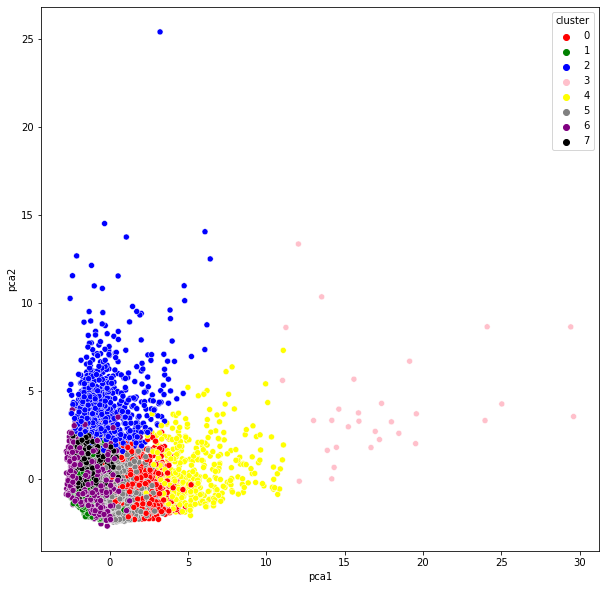

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x = 'pca1', y = 'pca2', hue='cluster', palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);

In [39]:
# aplicação do autoencoders
# redução de dimensionalidade 17 atributos para 10
# aplicação de Elbow metodo
# aplicação do Kmeans
# aplicação do PCA

In [40]:
clientes_scaler.shape

(8950, 17)

In [41]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [42]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [43]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [44]:
# encoder
encoder = Model(input_df, encoded)

In [45]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [46]:
autoencoder.fit(clientes_scaler, clientes_scaler, epochs = 50)

Epoch 1/50
280/280 [==============================] - 4s 15ms/step - loss: 0.2264
Epoch 2/50
280/280 [==============================] - 4s 16ms/step - loss: 0.1339
Epoch 3/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0788
Epoch 4/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0689
Epoch 5/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0534
Epoch 6/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0572
Epoch 7/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0525
Epoch 8/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0555
Epoch 9/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0516
Epoch 10/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0480
Epoch 11/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0389
Epoch 12/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0372
Epoch 13/50
2

In [47]:
clientes_scaler.shape

(8950, 17)

In [48]:
compact = encoder.predict(clientes_scaler)

In [49]:
compact.shape

(8950, 10)

In [50]:
clientes_scaler[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [51]:
# teste do cotovelo
wcss_2 =[]
range_valores = range(1, 20)
for i in range_valores:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

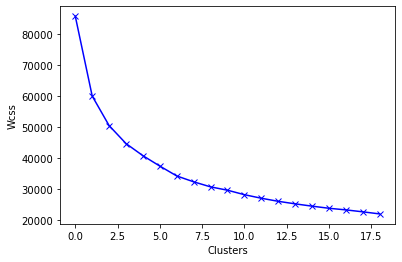

In [52]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Wcss');

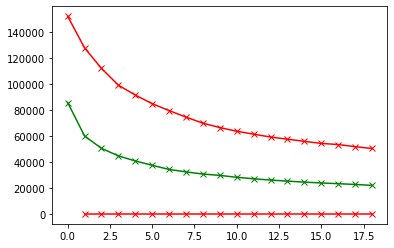

In [53]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g');

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [55]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 2, 0, ..., 1, 1, 1]), (8950,))

In [56]:
cluster_df_at = pd.concat([clientes_df, pd.DataFrame({'cluster': labels})], axis=1)
cluster_df_at

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [57]:
cluster_df_at['cluster'].unique()

array([0, 2, 1, 3])

In [58]:
# aplicação do PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.848035,-0.245869
1,0.892650,-1.003899
2,-1.849275,0.191208
3,0.365612,-0.231369
4,-1.280736,-0.183441


In [59]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-0.848035,-0.245869,0
1,0.892650,-1.003899,2
2,-1.849275,0.191208,0
3,0.365612,-0.231369,2
4,-1.280736,-0.183441,0
...,...,...,...
8945,2.524971,-1.300907,1
8946,3.445567,-1.491095,1
8947,3.423708,-1.653058,1
8948,3.085037,-2.704598,1


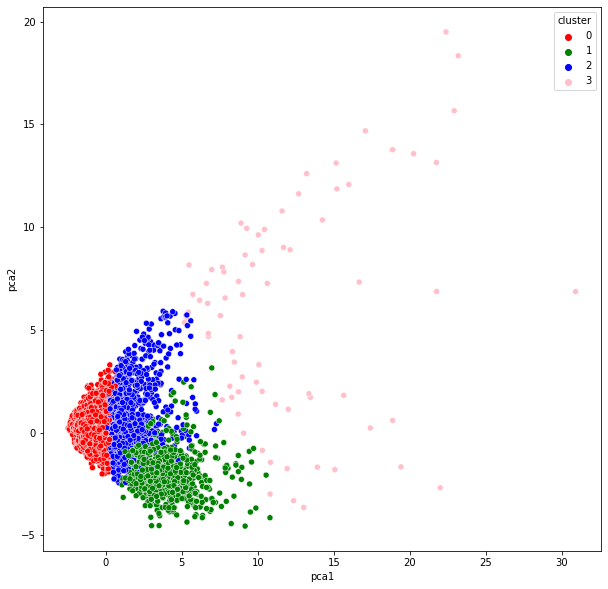

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink']);

In [61]:
df_cluster_ordenados = cluster_df_at.sort_values(by = 'cluster')
df_cluster_ordenados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5237,2292.952733,1.000000,0.0,0.0,0.0,523.015459,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,976.791650,724.561182,0.0,12,0
5236,27.170790,0.909091,275.0,0.0,275.0,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,3000.0,299.572759,149.944032,0.8,12,0
5235,576.890374,1.000000,1081.0,1081.0,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,6000.0,513.640460,190.606207,0.0,12,0
5234,264.869295,1.000000,940.0,940.0,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6000.0,753.034035,179.692509,0.0,12,0


In [62]:
df_cluster_ordenados.to_excel('./data/cluster_clientes_ordenados.xls')